<a href="https://colab.research.google.com/github/sipocz/_dengue/blob/main/_dengue_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:

#_Dengue
_project="_dengue"
_PCVERSION_=False
_GITHUBVERSION_=True
_GOOGLEVERSION_=False
if _PCVERSION_:
    basedir="C:/Users/sipocz/OneDrive/Dokumentumok/GitHub"

if _GOOGLEVERSION_:
    from google.colab import drive
    drive.mount('/content/drive',force_remount=True)
    basedir="/content/drive/My Drive/001_AI"

if _GITHUBVERSION_:
    !mkdir _dengue
    files=["dengue_features_train.csv","dengue_labels_train.csv","dengue_features_test.csv"]
    path="https://raw.githubusercontent.com/sipocz/_dengue/main/"
    basedir="./"
    storeto=basedir+_project
    for f in files:
        fname=path+f
        !rm $f
        !wget $fname
        !mv $f $storeto



mkdir: cannot create directory ‘_dengue’: File exists
rm: cannot remove 'dengue_features_train.csv': No such file or directory
--2021-08-01 13:53:58--  https://raw.githubusercontent.com/sipocz/_dengue/main/dengue_features_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 287139 (280K) [text/plain]
Saving to: ‘dengue_features_train.csv’

dengue_features_tra 100%[===================>] 280.41K  --.-KB/s    in 0.02s   

2021-08-01 13:53:58 (12.7 MB/s) - ‘dengue_features_train.csv’ saved [287139/287139]

rm: cannot remove 'dengue_labels_train.csv': No such file or directory
--2021-08-01 13:53:58--  https://raw.githubusercontent.com/sipocz/_dengue/main/dengue_labels_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.13

In [90]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#--------------scikit import 
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#--------------
def outlierStatistic(X_train_predict):
    print(X_train_predict)
    maxX=len(X_train_predict)
    outlier=0
    for i in X_train_predict:
        if i==-1:
            outlier+=1
    print(f"A összes ({maxX} darabból {outlier} darab outlier van. Az {outlier/maxX*100:5.1f} %.)")

features_train=basedir+_project+"/"+"dengue_features_train.csv"
labels_train=basedir+_project+"/"+"dengue_labels_train.csv"
features_test=basedir+_project+"/"+"dengue_features_test.csv"


X_train=pd.read_csv(features_train)
y_train=pd.read_csv(labels_train)
X_test=pd.read_csv(features_test)








In [93]:
X_test.isnull().sum()

city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                  43
ndvi_nw                                  11
ndvi_se                                   1
ndvi_sw                                   1
precipitation_amt_mm                      2
reanalysis_air_temp_k                     2
reanalysis_avg_temp_k                     2
reanalysis_dew_point_temp_k               2
reanalysis_max_air_temp_k                 2
reanalysis_min_air_temp_k                 2
reanalysis_precip_amt_kg_per_m2           2
reanalysis_relative_humidity_percent      2
reanalysis_sat_precip_amt_mm              2
reanalysis_specific_humidity_g_per_kg     2
reanalysis_tdtr_k                         2
station_avg_temp_c                       12
station_diur_temp_rng_c                  12
station_max_temp_c                        3
station_min_temp_c              

In [102]:
len(list(X_test[X_test.isnull().T.any().T]))

24

In [105]:
X_test[X_test.isnull().T.any().T].head(124)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
2,sj,2008,20,2008-05-13,-0.001500,NaN,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,296.4,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,296.9,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
7,sj,2008,25,2008-06-17,NaN,0.082150,0.144371,0.116729,30.81,300.484286,300.578571,295.997143,303.5,297.5,7.20,76.870000,30.81,17.420000,3.900000,28.757143,6.985714,34.4,24.4,0.3
11,sj,2008,29,2008-07-15,NaN,NaN,0.195843,0.176157,4.34,300.448571,300.607143,296.177143,302.3,298.7,5.49,77.615714,4.34,17.571429,2.614286,28.785714,5.014286,31.7,26.1,0.0
15,sj,2008,33,2008-08-12,NaN,NaN,0.058900,0.065643,4.28,301.150000,301.285714,296.912857,303.3,299.0,7.82,77.968571,4.28,18.418571,2.742857,29.214286,6.342857,33.9,25.0,1.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,iq,2011,28,2011-07-16,0.330200,0.334843,0.324957,0.319843,19.52,295.554286,296.464286,293.251429,305.5,290.6,25.70,88.778571,19.52,14.787143,9.271429,NaN,NaN,31.8,19.5,21.1
318,iq,2011,32,2011-08-13,0.322914,0.334943,0.293471,0.335500,7.30,297.454286,299.050000,294.522857,307.9,290.9,79.90,86.355714,7.30,16.032857,11.642857,27.020000,11.560000,34.2,20.4,NaN
339,iq,2012,1,2012-01-08,0.220886,0.235729,0.260271,0.321814,55.26,296.638571,297.200000,296.134286,303.1,293.8,140.80,97.435714,55.26,17.765714,5.800000,NaN,NaN,32.8,22.6,35.3
370,iq,2012,32,2012-08-12,0.289500,0.300171,0.239743,0.308771,16.38,297.657143,298.828571,292.920000,307.9,289.3,8.90,77.642857,16.38,14.560000,13.114286,27.000000,13.400000,34.2,18.3,NaN


In [42]:
X_train

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,296.825714,309.7,294.5,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,296.452857,308.5,291.9,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,295.501429,305.5,292.4,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,297.521429,295.324286,306.1,291.9,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0


In [43]:
y_train

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6
...,...,...,...,...
1451,iq,2010,21,5
1452,iq,2010,22,8
1453,iq,2010,23,1
1454,iq,2010,24,1


In [44]:

X_train_sj=X_train[X_train.city == "sj"]
X_train_iq=X_train[X_train.city == "iq"]


In [45]:
X_train.week_start_date.convert_dtypes()


0       1990-04-30
1       1990-05-07
2       1990-05-14
3       1990-05-21
4       1990-05-28
           ...    
1451    2010-05-28
1452    2010-06-04
1453    2010-06-11
1454    2010-06-18
1455    2010-06-25
Name: week_start_date, Length: 1456, dtype: string

In [46]:
X_train

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,296.825714,309.7,294.5,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,296.452857,308.5,291.9,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,295.501429,305.5,292.4,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,297.521429,295.324286,306.1,291.9,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0


In [47]:
y_train

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6
...,...,...,...,...
1451,iq,2010,21,5
1452,iq,2010,22,8
1453,iq,2010,23,1
1454,iq,2010,24,1


In [48]:
XX=X_train

In [49]:
XX["total_cases"]=y_train['total_cases']

In [98]:
XX.head(5)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [51]:

XX_sj=XX[XX.city == "sj"]
XX_iq=XX[XX.city == "iq"]

In [52]:
correlation=XX_sj.corr()

In [101]:
correlation["ndvi_se"]

year                                    -0.014863
weekofyear                              -0.009380
ndvi_ne                                  0.234049
ndvi_nw                                  0.196343
ndvi_se                                  1.000000
ndvi_sw                                  0.821354
precipitation_amt_mm                    -0.119386
reanalysis_air_temp_k                   -0.014601
reanalysis_avg_temp_k                   -0.011905
reanalysis_dew_point_temp_k             -0.062773
reanalysis_max_air_temp_k               -0.007382
reanalysis_min_air_temp_k               -0.045946
reanalysis_precip_amt_kg_per_m2         -0.130848
reanalysis_relative_humidity_percent    -0.114294
reanalysis_sat_precip_amt_mm            -0.119386
reanalysis_specific_humidity_g_per_kg   -0.058442
reanalysis_tdtr_k                        0.029358
station_avg_temp_c                      -0.056545
station_diur_temp_rng_c                  0.018121
station_max_temp_c                      -0.063718


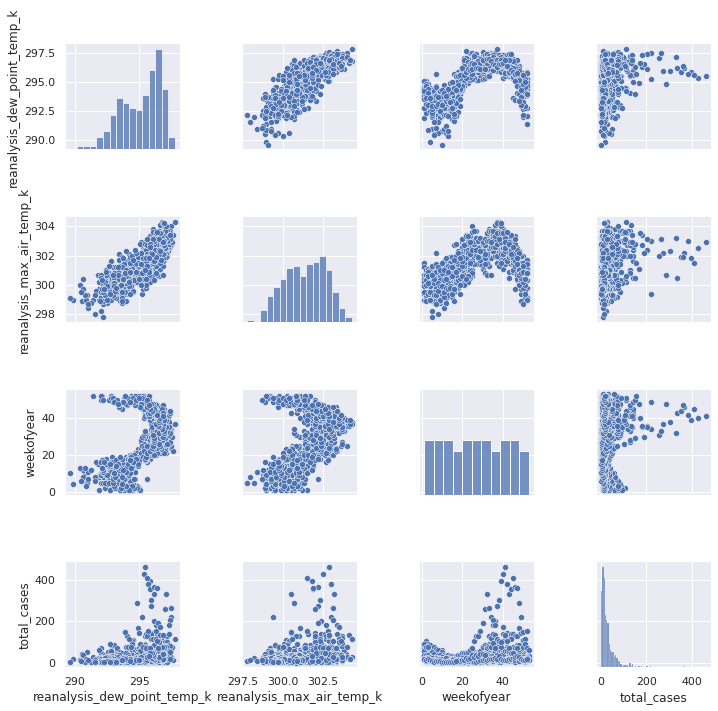

In [54]:
import seaborn as sns

sns.set()
sns.pairplot(XX_sj[["reanalysis_dew_point_temp_k","reanalysis_max_air_temp_k","weekofyear","total_cases"]], height = 2.5)
plt.show();

Text(0, 0, 'Hubert')

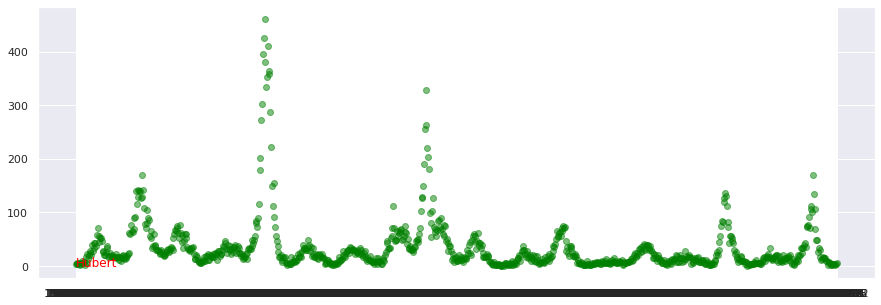

In [55]:
plt.figure(figsize=(15,5))
plt.subplot(111)
#plt.scatter(indexer,,c="green",alpha=0.5)
plt.scatter(XX_sj["week_start_date"],XX_sj["total_cases"],c="green",alpha=0.5)
#plt.scatter(indexer,hubpred_no_outliers[:],c="red",alpha=0.5)
#plt.plot(df["Id"],diffihubert[:])
plt.text(0,0,"Hubert",c="red")

In [56]:
!rm visual_view.py
!wget https://raw.githubusercontent.com/sipocz/messer/main/visual_view.py
grafikon=None
from visual_view import grafikon
help(grafikon)

--2021-08-01 13:49:38--  https://raw.githubusercontent.com/sipocz/messer/main/visual_view.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1027 (1.0K) [text/plain]
Saving to: ‘visual_view.py’

visual_view.py      100%[===================>]   1.00K  --.-KB/s    in 0s      

2021-08-01 13:49:38 (37.5 MB/s) - ‘visual_view.py’ saved [1027/1027]

Help on function grafikon in module visual_view:

grafikon(fx, desc1, txt1, desc2='', txt2='', ngraf=2, c1='rgba(35,128,132,0.8)', c2='rgba(193,99,99,0.8)', title=None)
    fx: dataFrame
    desc1:column1
    txt1: label1
    desc2:column2
    txt2: label2
    ngraf: number of graph
    c1: color1
    c2: color2
    title: graph title



In [57]:
grafikon(XX_sj,"total_cases","total_cases",ngraf=1,title="Adatok")

In [58]:
def grafikon(fx,ind,desc1,txt1,desc2="",txt2="",desc3="",txt3="",ngraf=2,c1='rgba(35,128,132,0.8)', c2='rgba(193,99,99,0.8)',c3='rgba(193,99,0,0.8)',title=None):
    '''
    fx: dataFrame
    ind: index
    desc1:column1
    txt1: label1
    desc2:column2
    txt2: label2
    ngraf: number of graph
    c1: color1
    c2: color2
    title: graph title
    '''
    
    #x_=[i for i in range(len(y_pred))]
    if title==None:
      title=txt1+txt2
    import plotly.express as px
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    fig0 = make_subplots(rows=1, cols=1)
    
    if True:
        fig0.add_trace(
            go.Scatter(x=fx[ind], y=fx[desc1], name=txt1, line=dict(color=c1) ,showlegend=True  ),

            row=1, col=1

        )
    
    if ngraf>1:
        fig0.add_trace(
            go.Scatter(x=fx[ind], y=fx[desc2], name=txt2, line=dict(color=c2) ,showlegend=True  ),

            row=1, col=1
        )
    if ngraf>2:
        fig0.add_trace(
            go.Scatter(x=fx[ind], y=fx[desc3], name=txt3, line=dict(color=c3) ,showlegend=True  ),

            row=1, col=1
        )



    fig0.update_layout(
        title=title,
        autosize=False,
        width=1200,
        height=600,
        
        )

    fig0.show()

In [59]:
grafikon(XX_sj,"week_start_date","total_cases","total_cases","reanalysis_relative_humidity_percent","reanalysis_relative_humidity_percent","station_avg_temp_c","station_avg_temp_c",ngraf=3,title="Adatok")

In [60]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


from statsmodels.tsa.seasonal import  seasonal_decompose

import matplotlib as mpl

In [61]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

df=XX_sj

data1 = seasonal_decompose(df["total_cases"][0:-1].values,model="additive", freq=51,) # 5 percenként vannak a minták
  

fig2 = make_subplots(rows=4, cols=1,shared_xaxes=True)
fig2.add_trace(
    go.Scatter(x=df.index[0:-1], y=data1.resid,name="Residual" ),

    row=1, col=1
)
fig2.add_trace(
    go.Scatter( x=df.index[0:-1], y=data1.trend,name="Trend"),

    row=2, col=1
)
fig2.add_trace(
    go.Scatter( x=df.index[0:-1], y=data1.seasonal,name="Seasonal"),

    row=3, col=1
)

fig2.add_trace(
    go.Scatter( x=df.index[0:-1], y=data1.observed,name="Observed"),

    row=4, col=1
)

fig2.update_layout(
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
)

fig2.show()



In [62]:
XX_sj.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases'],
      dtype='object')

In [63]:
prediktorok=['weekofyear',  'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm']

In [64]:
XX_sj.isnull().sum()


city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  191
ndvi_nw                                   49
ndvi_se                                   19
ndvi_sw                                   19
precipitation_amt_mm                       9
reanalysis_air_temp_k                      6
reanalysis_avg_temp_k                      6
reanalysis_dew_point_temp_k                6
reanalysis_max_air_temp_k                  6
reanalysis_min_air_temp_k                  6
reanalysis_precip_amt_kg_per_m2            6
reanalysis_relative_humidity_percent       6
reanalysis_sat_precip_amt_mm               9
reanalysis_specific_humidity_g_per_kg      6
reanalysis_tdtr_k                          6
station_avg_temp_c                         6
station_diur_temp_rng_c                    6
station_max_temp_c                         6
station_mi

In [65]:
XX_sj.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [66]:
from sklearn.linear_model import Lasso




alpha=0.00001
lassoreg = Lasso(alpha=alpha,normalize=False, max_iter=500, tol=0.0001)
lassoreg.fit(XX_sj[prediktorok],XX_sj[['total_cases']])
y_pred = lassoreg.predict(XX_sj[prediktorok])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 398223.2195243417, tolerance: 94.77985254470426



In [67]:
y_pred=y_pred.T

In [68]:
XX_sj["pred"]=y_pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [69]:
grafikon(XX_sj,"week_start_date","total_cases","total_cases","pred","pred",title="prediction",)

In [70]:
XX_sj.head(5)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,pred
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4,19.210641
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,22.033932
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4,19.845084
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3,24.269274
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6,35.322337


SJ random forest

In [106]:

from sklearn.ensemble import RandomForestRegressor

total_regressor=RandomForestRegressor(n_estimators=1540,criterion="mae")

yy=XX_sj[['total_cases']]
total_regressor.fit(XX_sj[prediktorok],yy)
y_pred=total_regressor.predict(XX_sj[prediktorok])

XX_sj["Randomforest_total"]=y_pred




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [107]:
grafikon(XX_sj,"week_start_date","total_cases","total_cases","Randomforest_total","Randomforest_total",title="Randomforest_total",)

Na estimation

In [73]:
ndv=["ndvi_ne","ndvi_nw","ndvi_se","ndvi_sw"]

In [74]:
XX_ndv=XX_sj[ndv]

In [75]:
XX_ndv

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw
0,0.122600,0.103725,0.198483,0.177617
1,0.169900,0.142175,0.162357,0.155486
2,0.032250,0.172967,0.157200,0.170843
3,0.128633,0.245067,0.227557,0.235886
4,0.196200,0.262200,0.251200,0.247340
...,...,...,...,...
930,0.044900,0.024450,0.101629,0.088000
931,0.077850,-0.039900,0.310471,0.296243
932,-0.038000,-0.016833,0.119371,0.066386
933,-0.155200,-0.052750,0.137757,0.141214


In [76]:
ndv_features=["ndvi_nw","ndvi_se","ndvi_sw"]


In [77]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

ne_regressor=RandomForestRegressor(n_estimators=140)

yy=XX_ndv[['ndvi_ne']]
ne_regressor.fit(XX_ndv[ndv_features],yy)
y_pred=ne_regressor.predict(XX_ndv[ndv_features])







/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [78]:
XX_ndv["ne_pred"]=y_pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [79]:
XX_ndv.head(10)

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,ne_pred
0,0.122600,0.103725,0.198483,0.177617,0.110386
1,0.169900,0.142175,0.162357,0.155486,0.148074
2,0.032250,0.172967,0.157200,0.170843,0.082213
3,0.128633,0.245067,0.227557,0.235886,0.139279
4,0.196200,0.262200,0.251200,0.247340,0.202021
6,0.112900,0.092800,0.205071,0.210271,0.077468
7,0.072500,0.072500,0.151471,0.133029,0.055471
8,0.102450,0.146175,0.125571,0.123600,0.103067
10,0.192875,0.082350,0.191943,0.152929,0.149345
11,0.291600,0.211800,0.301200,0.280667,0.270845


In [80]:
XX_ndv["ssz"]=XX_ndv.index

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [81]:
grafikon(XX_ndv,"ssz","ndvi_ne","ndvi_ne","ne_pred","ne_pred",ngraf=2,title="NDVI_NE")

In [82]:
ndv_features=['ndvi_ne',"ndvi_se","ndvi_sw"]


In [83]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

nw_regressor=RandomForestRegressor(n_estimators=140)

yy=XX_ndv[['ndvi_nw']]
nw_regressor.fit(XX_ndv[ndv_features],yy)
y_pred=nw_regressor.predict(XX_ndv[ndv_features])







/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [84]:
XX_ndv["nw_pred"]=y_pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [85]:
grafikon(XX_ndv,"ssz","ndvi_nw","ndvi_nw","nw_pred","nw_pred",ngraf=2,title="NDVI_NW")

In [86]:
ndv_features=["ndvi_nw","ndvi_se","ndvi_sw"]
